In [1]:

import process_gens
import pandas as pd
from helm.benchmark.runner import InstanceGenerations,GenerationSummary
from typing import Any, List
import json
from helm.common.request import (GeneratedOutput, Token)

import PostMetric
import pandas as pd

from helm.benchmark.metrics.statistic import Stat
from typing import Dict, Optional

from helm.benchmark.augmentations.perturbation_description import (
    PerturbationDescription)
from dataclasses import dataclass
from process_gens import *



processGens=ProcessGens()
# compare_metric="example_comet"
# process_gen_mode="full_sample"


process_gen_mode="llama_gsm_sample"
compare_metric='final_num_exact_match'


processGens.init_with_mode(process_gen_mode)


root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics = processGens.get_params()

print(f"\t root_folder: {root_folder} \n \t num_beams_list {num_beams_list} \n \t models: {models} \n \t custom_metrics{[metric.name() for metric in custom_metrics]}"+ 
    f"\n \t task_names {task_names} \n \t suite_name {suite_name} \n \t instance_metrics {instance_metrics}")


/opt/miniconda3/envs/crfm-helm2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PyTorch version 2.6.0 available.


Init: process_gens_mode llama_gsm_sample
calculate_gen_summary_dict
path is snellius_copies/helm_output/sample_100_eval_100/gsm_/meta_llama_Llama_3.1_8B_Instruct/1_beams/runs/sample_100_eval_100/generation_summary.json
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
examples len is 1
example

/opt/miniconda3/envs/crfm-helm2/lib/python3.9/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/miniconda3/envs/crfm-helm2/lib/python3.9/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/miniconda3/envs/crfm-helm2/lib/python3.9/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using low

In [2]:
instanceGeneration=get_first(processGens.first_run_instances)
print(len(instanceGeneration.examples))

#current belief: for each run_folder combo, there will be 100 instances and 100 examples per instance

1


In [3]:

from process_gen_utils import *
print(f"sum(num_beams_list) {sum(num_beams_list)}")
examples_df, completions_df=get_dfs(processGens, num_beams_list)

# for df in examples_df, completions_df:

print(examples_df.head(2))



sum(num_beams_list) 1
Index(['beam_num', 'task_name', 'model', 'example_idx', 'text',
       'completion_length', 'output_logprob', 'instanceID', 'isCompletion',
       'final_num_exact_match'],
      dtype='object')
Num examples: 100
Num completions: 100
   beam_num  task_name  model  example_idx  \
0         1          0      0            0   
1         1          0      0            0   

                                                text  completion_length  \
0  First, we need to figure out how long it took ...                424   
1  Allan has 40 cannolis, and there are twice as ...                634   

   output_logprob instanceID  isCompletion  final_num_exact_match  
0      -41.756677     id8131          True               0.458067  
1      -50.948469     id7879          True               0.472919  


In [4]:
print(examples_df[[compare_metric]].mean())

final_num_exact_match    0.389671
dtype: float64


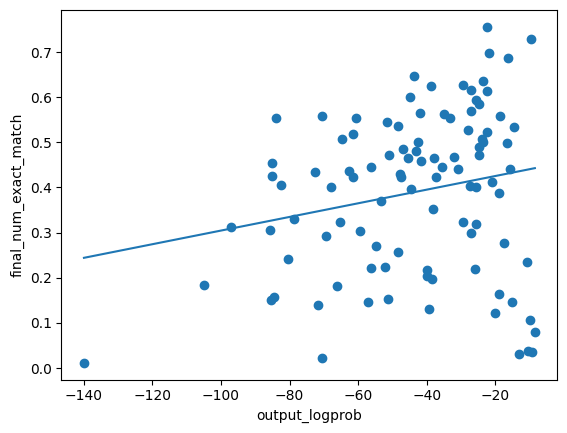

In [5]:
# examples_df
plot_keys(df=examples_df, xlabel='output_logprob', ylabel=compare_metric)

In [6]:
# for col in [compare_metric, 'output_logprob']:
#     examples_df[col + '_norm'] = examples_df.groupby('instanceID')[col].transform(
#         lambda x: (x - x.mean()) / x.std()
# #     )
# print(examples_df)
# plot_keys(df=examples_df, xlabel='output_logprob_norm', ylabel=compare_metric+'_norm')

In [7]:
simple_df=examples_df[["instanceID", "example_idx", compare_metric, "output_logprob"]]
filtered_df=simple_df[simple_df["instanceID"]=="id8131"]
print(filtered_df.head(10))
print(len(examples_df))

  instanceID  example_idx  final_num_exact_match  output_logprob
0     id8131            0               0.458067      -41.756677
100


/Users/lukecadigan/thesis/helm/process_gen_utils.py:167: RankWarning: Polyfit may be poorly conditioned
  plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))


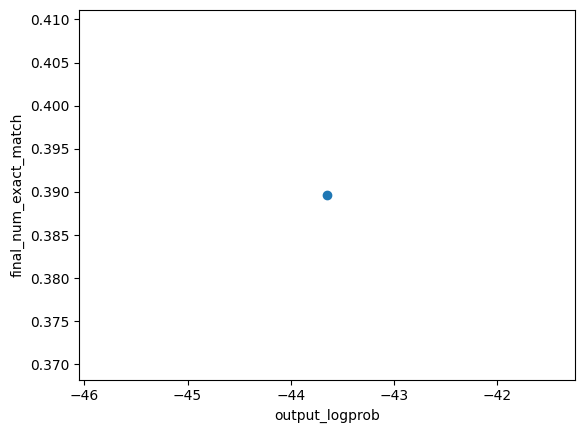

In [8]:


grouped_df = examples_df[["example_idx", compare_metric, "output_logprob"]].groupby('example_idx').mean()

grouped_df.head(2)

plot_keys(grouped_df, "output_logprob", compare_metric)